In [4]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

In [18]:
class LinearRegression:
    import numpy as np 
    import pandas as pd 
    @classmethod 
    def OLS(cls,df,x_name='x',y_name='y'):
        if isinstance(df,pd.DataFrame):
            x_bar = np.mean(df[x_name])
            y_bar = np.mean(df[y_name])
            cov_matrix = np.cov(df[x_name],df[y_name]) #np.cov = covariance matrix (var_X, Cov(X,Y) | var_Y, Cov(Y,X))
            var_X = cov_matrix[0,0]
            cov_XY = cov_matrix[0,1]
            B_1 = (cov_XY/ var_X)
            B_0 = y_bar - (B_1*x_bar)
            df["y_estimated"] = df[x_name].apply(lambda x: B_0 + (B_1*x)) 
            df["residual"] = (df[y_name] - df["y_estimated"])
            #residual = sum(df["residual"])
        return [(B_0,B_1),df] 

            
    @classmethod 
    def normalization(cls,df):
        if isinstance(df,pd.DataFrame):
            for i in df.columns:
                mu = np.mean(df[i]) 
                df[i] = df[i].apply(lambda x: (x - mu) / np.std(df[i]))  
        cls.df = df  
        return cls.df 
    def __init__(self,dataset=None,alpha=None,theta0=None,theta1=None):
        self.dataset = dataset 
        self.alpha = alpha
        self.theta0 = theta0
        self.theta1 = theta1 
    def descent(self):
        dJdt0 = 0
        dJdt1 = 0
        m = len(self.dataset)
        for index,kvp in self.dataset.iterrows(): #kvp contains x and y values
            dJdt0 += ((self.theta0 + self.theta1*(kvp[0])) - kvp[1]) 
            dJdt1 += ((self.theta0 + self.theta1*(kvp[0])) - kvp[1]) * kvp[0] 
        self.theta0 = self.theta0 - (self.alpha*((dJdt0/m)))
        self.theta1 = self.theta1 - (self.alpha*((dJdt1/m)))
        return self.theta0,self.theta1
    def J(self):
        J = 0
        m = len(self.dataset)
        for index,kvp in self.dataset.iterrows():
            prediction = self.theta0 + (self.theta1*kvp[0])
            J += (1/(2*m))*(prediction - kvp[1])**2
        return J
    def iterations(self,n=100):
        cost_list = []
        for i in range(n):
            self.descent()
            cost = self.J()
            cost_list.append((cost,self.theta0,self.theta1))
        return sorted(cost_list,key=lambda x: x[0])
    def stopping_criteria(self,dJgT=True,threshold=0.00001,max_iterations=1000):
        cost_list = []
        deltaJ = 0
        iteration = 0 
        while dJgT and (iteration < max_iterations):
            self.descent()
            cost = self.J()
            cost_list.append((cost,self.theta0,self.theta1))
            if len(cost_list) > 1:
                deltaJ = abs(cost_list[-1][0] - cost_list[-2][0])
                if deltaJ < threshold:
                    dJgT = False
            iteration += 1
            if iteration > max_iterations:
                raise ValueError("max number of iterations reached")
        print(f'iteration_n:{iteration}')
        return sorted(cost_list,key=lambda x:x[0])[0]

    

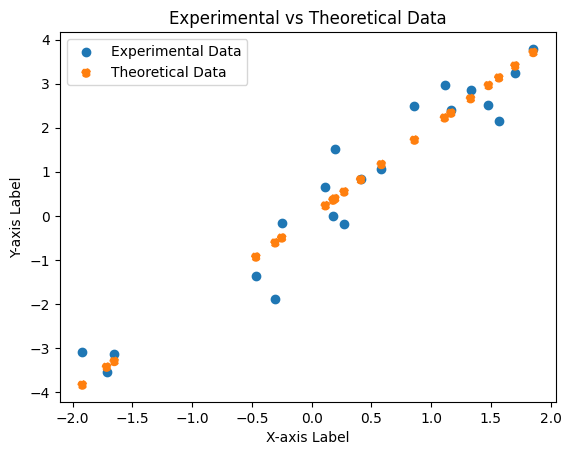

In [6]:
df = pd.read_csv("./linear_regression_test_data.csv")

df.drop(columns="Unnamed: 0",inplace=True)
import matplotlib.pyplot as plt

# Plot y1 and y2 against x
plt.scatter(df['x'], df['y'], label='Experimental Data')
plt.scatter(df['x'], df['y_theoretical'], label='Theoretical Data', linestyle='--')

# Add labels and a legend
plt.xlabel('X-axis Label') 
plt.ylabel('Y-axis Label')  
plt.title('Experimental vs Theoretical Data')
plt.legend()

# Show the plot
plt.show()


In [7]:
df2 = df[["x","y"]] #make a copy of the data 

df2 = LinearRegression().normalization(df2) #apply normalization, make sure to do it to both datasets 

lm  = LinearRegression(df2,alpha=0.01,theta0=0,theta1=0) #Initalization of class 

#lm_100 = lm.iterations(n=100) #Create Linear model using iterations function
# print(lm_100[0])
# min(lm_100,key=lambda x:x[0])

J,theta0,theta1 = lm.stopping_criteria() #Create linear model using stopping criteria function
print(f'lm_stopping_criteria:{J,theta1,theta0}')


iteration_n:341
lm_stopping_criteria:(0.03587224928317982, 0.9326600929746728, 6.736278201913126e-17)


In [8]:
df2["y_theoretical"] = None
df2["y_theoretical"] = df2["x"].apply(lambda x: 6.736278201913126e-17 + (0.9326600929746728)*x) #J=0.35

In [9]:
df2.head() 

,x,y,y_theoretical
0,-2.034453,-1.692047,-1.897453
1,-1.850274,-1.892148,-1.725677
2,-1.791947,-1.716985,-1.671278
3,-0.718022,-0.909984,-0.669671
4,-0.572277,-1.148321,-0.533740


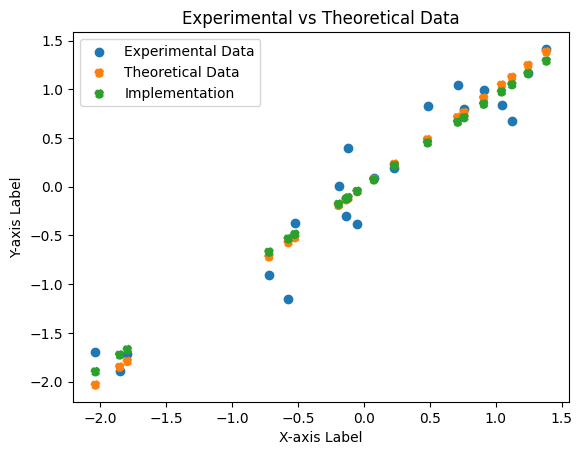

In [10]:
df = LinearRegression.normalization(df) #make sure to normalize inital data too 
# Plot y1 and y2 against x
plt.scatter(df['x'], df['y'], label='Experimental Data')
plt.scatter(df['x'], df['y_theoretical'], label='Theoretical Data', linestyle='--')
plt.scatter(df2["x"],df2["y_theoretical"],label="Implementation",linestyle='--')

#Add labels 
plt.xlabel('X-axis Label') 
plt.ylabel('Y-axis Label')  
plt.title('Experimental vs Theoretical Data')
plt.legend()

# Show the plot
plt.show()

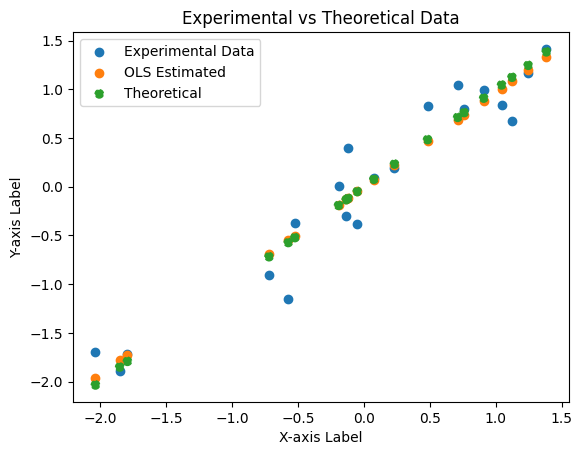

In [22]:
#OLS method 
df = pd.read_csv('./linear_regression_test_data.csv')
df.drop(columns="Unnamed: 0",inplace=True)
df_norm = LinearRegression.normalization(df)

OLS = LinearRegression.OLS(df_norm,x_name='x',y_name='y')



plt.scatter(OLS[1]['x'], OLS[1]['y'], label='Experimental Data')
plt.scatter(OLS[1]['x'], OLS[1]['y_estimated'], label='OLS Estimated', linestyle='-')  
plt.scatter(OLS[1]["x"],df_norm["y_theoretical"],label="Theoretical",linestyle='--')
 
plt.xlabel('X-axis Label') 
plt.ylabel('Y-axis Label')  
plt.title('Experimental vs Theoretical Data')
plt.legend()

plt.show()

In [23]:
OLS[1]

,x,y,y_theoretical,y_estimated,residual
0,-2.034453,-1.692047,-2.034453,-1.961149,0.269102
1,-1.850274,-1.892148,-1.850274,-1.783606,-0.108542
2,-1.791947,-1.716985,-1.791947,-1.727381,0.010397
3,-0.718022,-0.909984,-0.718022,-0.692151,-0.217833
4,-0.572277,-1.148321,-0.572277,-0.551657,-0.596663
5,-0.521782,-0.373906,-0.521782,-0.502982,0.129076
6,-0.190855,0.003587,-0.190855,-0.183979,0.187566
7,-0.132909,-0.301432,-0.132909,-0.128120,-0.173312
8,-0.118664,0.392884,-0.118664,-0.114389,0.507272
9,-0.048965,-0.378572,-0.048965,-0.047201,-0.331371


In [19]:
#Initialized functions 
def descent(dataset,alpha=0.1):
    import random
    theta0 = random.random()
    theta1 = random.random()
    dJdt0 = 0
    dJdt1 = 0
    m = len(dataset)
    for x_i,y_i in dataset:
        dJdt0 += ((theta0 + theta1*(x_i)) - y_i) 
        dJdt1 += ((theta0 + theta1*(x_i)) - y_i) * x_i 
    theta0 = theta0 - (alpha*((dJdt0/m)))
    theta1 = theta1 - (alpha*((dJdt1/m)))
    return theta0,theta1
def J(theta0,theta1,dataset):
    J = 0
    m = len(dataset)
    for x_i,y_i in dataset:
        prediction = theta0 + (theta1*x_i)
        J += (1/(2*m))*(prediction - y_i)**2
    return J
def iterations(n,dataset,alpha=0.1):
    cost_list = []
    for i in range(n):
        theta0,theta1 = descent(dataset,alpha)
        cost = J(theta0,theta1,dataset)
        cost_list.append((cost,theta0,theta1))
    return sorted(cost_list,key=lambda x: x[0])